# Hands-On Tutorial 2: Linear Models
Today we will learn how to implement Logistic and Linear Regression.

## 1. Logistic Regression
Logistic regression is a supervised learning classification algorithm, which means it can estimate the class of new observation based on labeled observations. In essence, logistic regression models the probability that an observation belongs to a particular category.


Let's learn how to implement Logistic Regression from scratch!

### Creating a Dataset
We will apply logistic regression to a binary classification problem with 10 observations and 2 features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(
        n_samples=10, 
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=1, 
        n_clusters_per_class=1)
print(X)
print(y)

### Visualizing the Data
We have 10 observations $X$ with 2 features $\theta$ and we know their labels $y$. Can we predict the label of a new observation?

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

### Compute the Hypothesis Function
Logistic regression uses the $\textbf{Sigmoid Function}$ to calculate probability of an observation belonging to a particular class. The function returns a value between 0 and 1. 
The Sigmoid function is defined as:
$$
g(z) = \frac{1}{1 + e^{-z}}
$$

We define our hypothesis as follows: 
$$
h(X) = g(X\theta)
$$
$$
h(x) = \frac{1}{1+ e^{-X\theta}}
$$

$h(X)$ gives us the probability of our output being 1, that is
* if $X\theta \geq 0$, then $h(X) \geq 0.5$, then predict $y=1$
* if $X\theta < 0$, then $h(X) < 0.5$, then predict $y=0$

Follow the instructions to complete the two functions below.
1. $\texttt{sigmoidFn}$: Takes a parameter $z$, and returns the sigmoid of $z$. 
2. $\texttt{hypothesis}$: Takes parameters $X$, $\theta$ and returns $h(x)$. Define $z$ in this function as $X\theta$

In [7]:
def sigmoidFn(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(X, theta):
    z = np.dot(X, theta)
    h = sigmoidFn(z)
    return h

### Initialization
First, we will add an intercept to our $X$ values and initialize $\theta$ to zero.

In [23]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

XX = add_intercept(X)
theta = np.zeros(XX.shape[1])
h = hypothesis(XX, theta)

print(XX)
print(theta)
print(h)

[[ 1.         -0.64185521  0.78535215]
 [ 1.          0.10972634  1.83671408]
 [ 1.         -1.07362634  2.591487  ]
 [ 1.         -1.38222372  0.85340843]
 [ 1.          1.78689446  2.3841826 ]
 [ 1.          0.94785273  3.53015683]
 [ 1.          1.08876018  1.35925144]
 [ 1.          0.42774158  3.54015499]
 [ 1.         -0.88398194 -0.57876171]
 [ 1.         -1.59347411  1.2168913 ]]
[0. 0. 0.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


### Cost Function
The cost function is defined as follows:
$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m \Big( y_i \text{log}(h_i) + (1-y_i)\text{log}(1-h_i) \Big)
$$

where $m$ is the number of observations.

In [24]:
cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
print(cost)

0.6931471805599453


### Gradient Descent
In order to get an accurate prediction, we need to minimise the cost function. This is done using Gradient Descent where we take the derivative of the cost function w.r.t $\theta$. The overall functionality is given below.
$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta}
$$
where $\alpha$ is the learning rate.

We can show that,
$$
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T (h-y)
$$


In [ ]:
m = y.size
alpha = 0.01

gradient = np.dot(XX.T, (h - y)) / m
theta -= alpha * gradient

print(gradient)
print(theta)

### Training the Model
Now we will repeat the step to calculate the gradient and theta for a number of iterations.

In [ ]:
num_iter = 100000
cost_list = []

for i in range(num_iter):
    h = hypothesis(XX, theta)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    cost_list.append(cost)
    
    gradient = np.dot(XX.T, (h - y)) / m
    theta -= alpha * gradient


    if i % 10000 == 0:
        print('Cost: {}'.format(cost))

print('Adjusted coefficient: {}'.format(theta))

### Plot the loss function

In [ ]:
plt.plot(range(num_iter), cost_list)

### Predicted Values

In [ ]:
preds_prob = hypothesis(XX, theta)
preds = preds_prob.round()
print(preds)

In [ ]:
new_x = np.array([1, -0.8, 0.8])   # new observation (-0.8, 0.8)  with an intercept of 1
print(new_x)
preds_prob_new_x = hypothesis(new_x, theta).round()
print("predicted output for the new observation: ", preds_prob_new_x)

### Decision Boundary


(-0.5787617147305777, 3.540154992249955)

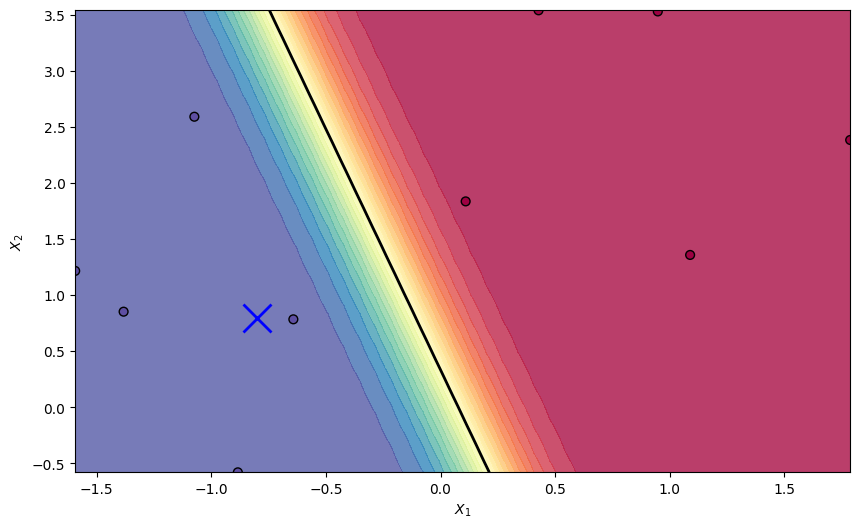

In [18]:
plt.figure(figsize=(10, 6))

# define 2d grid
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

# make predictions on the grid
grid = add_intercept(grid)
probs = hypothesis(grid, theta)
probs = probs.reshape(xx1.shape)

# plot contours
ax = plt.gca()
plt.contourf(xx1, xx2, probs, levels=25, cmap=plt.cm.Spectral, alpha=0.8)
plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black') # decision boundary at 0.5
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.plot(-0.8, 0.8, 'bx', markersize=20, markeredgewidth=2)  # new observation correctly classified as 1 (blue)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
ax.set_xlim([x1_min, x1_max])
ax.set_ylim([x2_min, x2_max])